In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("elevator_arrival.csv")
df.columns = ["floor","arrival_time","compound"]

In [8]:
df.dtypes

floor            int64
arrival_time    object
compound         int64
dtype: object

In [9]:
df.head()

,floor,arrival_time,compound
0,3,0:09:40,2
1,3,0:23:39,1
2,3,0:25:48,1
3,3,0:25:56,1
4,3,0:26:12,1


In [3]:
df['arrival'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S', errors='raise')
df["arrivalsec"] = df["arrival"].dt.second
df["arrivalmin"] = df["arrival"].dt.minute
df["arrivalhour"] = df["arrival"].dt.hour
df["all"] = df["arrivalsec"]/60+df["arrivalmin"] +60*df["arrivalhour"]


In [4]:
df.describe()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,9.170543,1.434109,28.348837,23.379845,0.418605,48.968605
std,10.674242,0.798876,18.091629,13.664618,0.495254,27.774765
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.283333
25%,1.000000,1.000000,12.000000,13.000000,0.000000,25.566667
50%,5.000000,1.000000,27.000000,22.000000,0.000000,43.366667
75%,11.000000,2.000000,45.000000,31.000000,1.000000,75.266667
max,33.000000,4.000000,59.000000,59.000000,1.000000,90.516667


In [6]:
grouped = df.groupby(df.floor) 
df_1 = grouped.get_group(1) 
df_3 = grouped.get_group(3)
df_5 = grouped.get_group(5)
df_11 = grouped.get_group(11)
df_33 = grouped.get_group(33)

<AxesSubplot:>

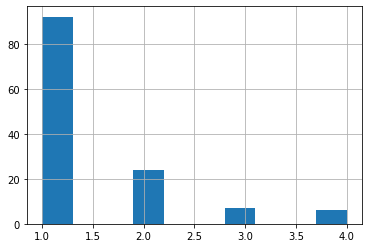

In [7]:
df["compound"].hist()

In [8]:

sum(df["compound"]==1)

92

In [9]:
len(df)

129

In [10]:
df.sort_values(by=['all'])

,floor,arrival_time,compound,arrival,arrivalsec,arrivalmin,arrivalhour,all
110,33,0:01:17,1,1900-01-01 00:01:17,17,1,0,1.283333
111,33,0:01:23,1,1900-01-01 00:01:23,23,1,0,1.383333
112,33,0:02:34,2,1900-01-01 00:02:34,34,2,0,2.566667
51,5,0:03:00,2,1900-01-01 00:03:00,0,3,0,3.000000
113,33,0:06:19,1,1900-01-01 00:06:19,19,6,0,6.316667
...,...,...,...,...,...,...,...,...
49,1,1:28:52,1,1900-01-01 01:28:52,52,28,1,88.866667
101,11,1:30:10,1,1900-01-01 01:30:10,10,30,1,90.166667
109,11,1:30:16,1,1900-01-01 01:30:16,16,30,1,90.266667
102,11,1:30:18,1,1900-01-01 01:30:18,18,30,1,90.300000


### homogenity test: 각 층에 대한 data 

Kruskall - wallis test 이용

In [5]:
grouped = df.groupby(df.floor) 
df_1 = grouped.get_group(1) 
df_3 = grouped.get_group(3)
df_5 = grouped.get_group(5)
df_11 = grouped.get_group(11)
df_33 = grouped.get_group(33)

In [32]:
data.head()

,compound,all
6,2,10.066667
7,1,10.483333
8,1,10.516667
9,4,14.166667
10,1,22.666667


### 동질성 확인 kruskal wallis test

#### 도착 시간 분포

In [13]:
from scipy.stats import *
kruskal(df_1["all"],df_3["all"])

KruskalResult(statistic=5.888034188034197, pvalue=0.015244108125716761)

In [14]:
kruskal(df_1["all"],df_5["all"])

KruskalResult(statistic=9.445493132971096, pvalue=0.002116685805182548)

In [15]:
kruskal(df_5["all"],df_3["all"])

KruskalResult(statistic=1.699300699300693, pvalue=0.19237945578481852)

#### 3, 5데이터 합칠 수 있음

In [16]:

kruskal(df_1["all"],df_3["all"],df_5["all"])

KruskalResult(statistic=13.260090025868537, pvalue=0.0013201036629437014)

In [17]:
kruskal(df_33["all"],df_3["all"])

KruskalResult(statistic=0.036437246963572534, pvalue=0.8486153563255542)

3층 데이터, 3층 2번째 데이터 합칠 수 있음

In [18]:
kruskal(df_33["all"],df_5["all"])

KruskalResult(statistic=0.2555888047878909, pvalue=0.6131670323645546)

3층 2번쨰 데이터 5층 데이터 합칠 수 있음

In [19]:
kruskal(df_33["all"],df_3["all"],df_5["all"])

KruskalResult(statistic=1.0010900031142853, pvalue=0.6062001896201727)

3, 3층 2번째 , 5층 데이터 합칠 수있음

In [20]:
kruskal(df_1["all"],df_11["all"])

KruskalResult(statistic=1.0642251953767068, pvalue=0.30225349028295456)

### 도착 사람 수

In [14]:
kruskal(df_1["compound"],df_3["compound"])

KruskalResult(statistic=0.17036201929099276, pvalue=0.6797902699328298)

In [18]:
kruskal(df_11["compound"],df_3["compound"])

KruskalResult(statistic=0.039226195793493956, pvalue=0.8430012168557302)

In [20]:
kruskal(df_11["compound"],df_33["compound"])

KruskalResult(statistic=0.8195080605643741, pvalue=0.3653240366149073)

In [15]:
kruskal(df_1["compound"],df_5["compound"])

KruskalResult(statistic=1.064203611138342, pvalue=0.3022583930471593)

In [19]:
kruskal(df_11["compound"],df_5["compound"])

KruskalResult(statistic=0.004740888467998373, pvalue=0.9451057466711268)

In [16]:
kruskal(df_3["compound"],df_5["compound"])

KruskalResult(statistic=0.06077872744538337, pvalue=0.8052693367610084)

In [21]:
kruskal(df_33["compound"],df_5["compound"])

KruskalResult(statistic=0.6811145510835611, pvalue=0.40920319651656345)

In [17]:
kruskal(df_1["compound"],df_3["compound"],df_5["compound"])

KruskalResult(statistic=1.1238536581361116, pvalue=0.5701095012953918)

In [22]:
kruskal(df_1["compound"],df_3["compound"],df_11["compound"],df_33["compound"],df_5["compound"])

KruskalResult(statistic=3.501895523494804, pvalue=0.47759018451117885)

In [87]:
df1 = pd.concat([df_1,df_11])
df35 = pd.concat([df_3,df_5,df_33])
df1.index = [i+1 for i in range(len(df1))]
df35.index = [i+1 for i in range(len(df35))]

In [ ]:
df1 = pd.concat([df_1,df_11])
df35 = pd.concat([df_3,df_5,df_33])
df1.index = [i+1 for i in range(len(df1))]
df35.index = [i+1 for i in range(len(df35))]

allplus = [df1["all"][i+1] for i in range(len(df1))]
allplus.insert(0,0)
allplus.pop()
df1["allplus"] = allplus
df1["inter"] = df1["all"]-df1["allplus"]
df_ = df1.iloc[1:]
df_.corr()

In [88]:
df1.head()

,floor,arrival_time,compound,arrival,arrivalsec,arrivalmin,arrivalhour,all
1,1,0:10:04,2,1900-01-01 00:10:04,4,10,0,10.066667
2,1,0:10:29,1,1900-01-01 00:10:29,29,10,0,10.483333
3,1,0:10:31,1,1900-01-01 00:10:31,31,10,0,10.516667
4,1,0:14:10,4,1900-01-01 00:14:10,10,14,0,14.166667
5,1,0:22:40,1,1900-01-01 00:22:40,40,22,0,22.666667


In [89]:
allplus = [df1["all"][i+1] for i in range(len(df1))]
allplus.insert(0,0)
allplus.pop()
df1["allplus"] = allplus
df1["inter"] = df1["all"]-df1["allplus"]
df_ = df1.iloc[1:]
df_.corr()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all,allplus,inter
floor,1.000000,-0.151362,0.009363,0.017894,0.083048,0.109392,0.144056,-0.074074
compound,-0.151362,1.000000,0.056195,-0.129840,0.224742,0.205687,0.149881,0.107943
arrivalsec,0.009363,0.056195,1.000000,0.191753,-0.286582,-0.235929,-0.197492,-0.071557
arrivalmin,0.017894,-0.129840,0.191753,1.000000,-0.576694,-0.184355,-0.201250,0.039985
arrivalhour,0.083048,0.224742,-0.286582,-0.576694,1.000000,0.909217,0.815315,0.164955
all,0.109392,0.205687,-0.235929,-0.184355,0.909217,1.000000,0.878606,0.218447
allplus,0.144056,0.149881,-0.197492,-0.201250,0.815315,0.878606,1.000000,-0.274086
inter,-0.074074,0.107943,-0.071557,0.039985,0.164955,0.218447,-0.274086,1.000000


In [90]:
allplus = [df35["all"][i+1] for i in range(len(df35))]
allplus.insert(0,0)
allplus.pop()
df35["allplus"] = allplus
df35["inter"] = df35["all"]-df35["allplus"]
df_ = df35.iloc[1:]
df_.corr()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all,allplus,inter
floor,1.000000,-0.087405,0.032906,-0.289134,0.186531,0.016836,0.060062,-0.070554
compound,-0.087405,1.000000,0.011710,-0.029617,-0.086712,-0.105651,-0.074033,-0.059848
arrivalsec,0.032906,0.011710,1.000000,0.134017,-0.047931,0.043739,-0.083369,0.213983
arrivalmin,-0.289134,-0.029617,0.134017,1.000000,-0.321325,0.273684,0.100024,0.307297
arrivalhour,0.186531,-0.086712,-0.047931,-0.321325,1.000000,0.822800,0.755933,0.168448
all,0.016836,-0.105651,0.043739,0.273684,0.822800,1.000000,0.826612,0.357591
allplus,0.060062,-0.074033,-0.083369,0.100024,0.755933,0.826612,1.000000,-0.229971
inter,-0.070554,-0.059848,0.213983,0.307297,0.168448,0.357591,-0.229971,1.000000


In [24]:
kruskal(df1["all"],df35["all"])

KruskalResult(statistic=24.000410096607776, pvalue=9.631518402490757e-07)

<AxesSubplot:>

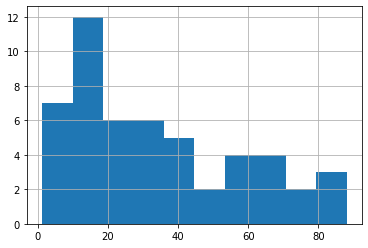

In [25]:
df35["all"].hist(bins=10)

<AxesSubplot:>

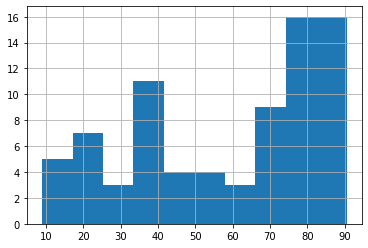

In [26]:
df1["all"].hist()

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

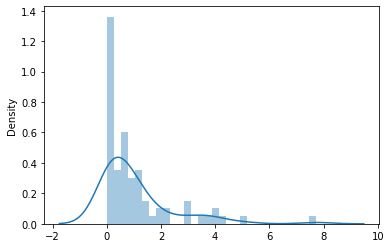

In [27]:
inter_1 = []
data = sorted(df1["all"])
for i in range(len(data)-1):
    inter_1.append(data[i+1]-data[i] )
inter_1 = pd.Series(inter_1)
sns.distplot(inter_1, bins=30)

In [117]:
save1 = pd.Series(inter_1)
save1.to_csv("save1.csv",header=False, index=False)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

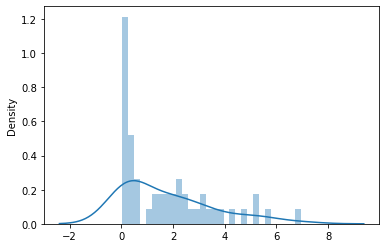

In [28]:
inter_35 = []
data = sorted(df35["all"])
for i in range(len(data)-1):
    inter_35.append(data[i+1]-data[i] )
inter_35 = pd.Series(inter_35)
sns.distplot(inter_35, bins=30)

In [29]:
save = pd.Series(inter_35)

<AxesSubplot:>

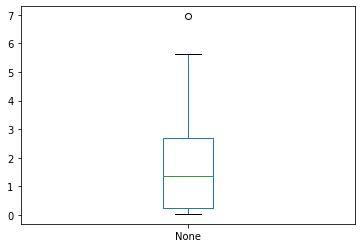

In [30]:
save.plot.box()

In [102]:
save.describe()

count    50.000000
mean      1.735333
std       1.770832
min       0.033333
25%       0.250000
50%       1.350000
75%       2.700000
max       6.950000
dtype: float64

In [83]:
save.to_csv("save.csv",header=False, index=False)

## easyfit 결과

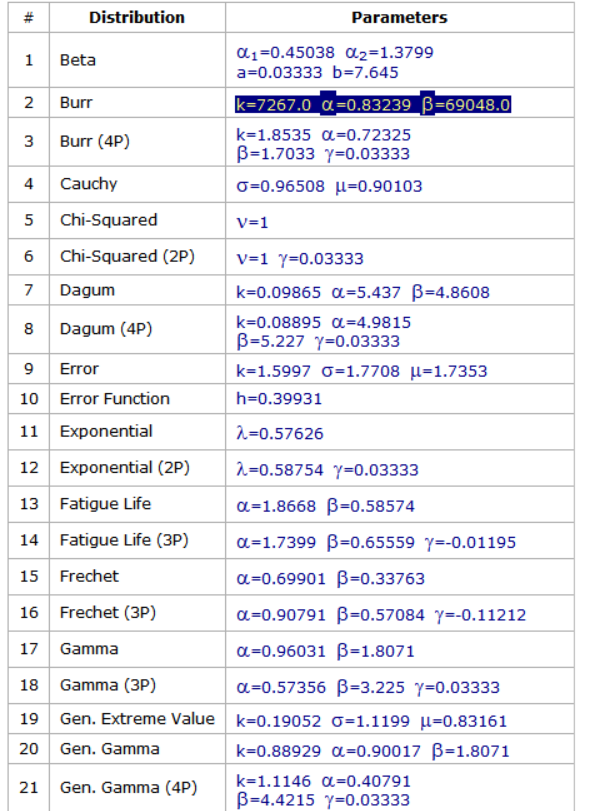

## goodness of fit 결과

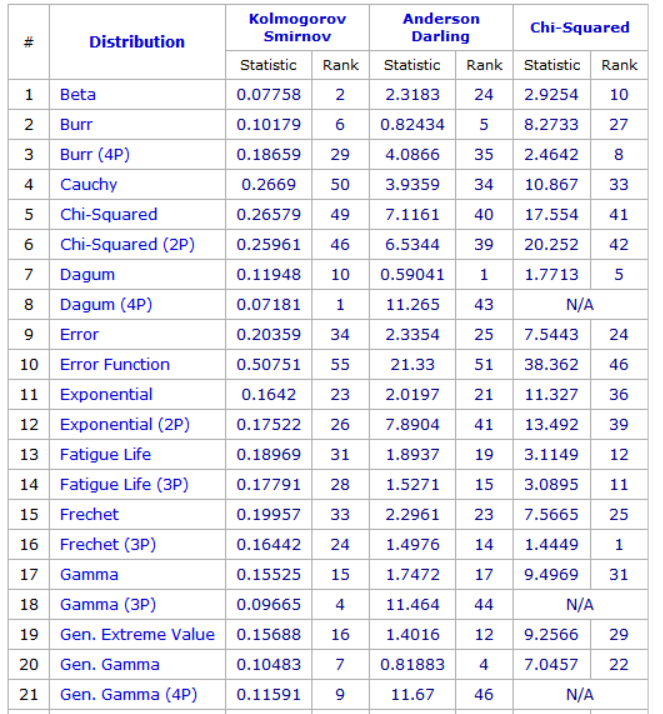

beta
weibull
pearson 6
johnson sb
dagum

In [40]:
loc, lambdaa = expon.fit(inter_35)

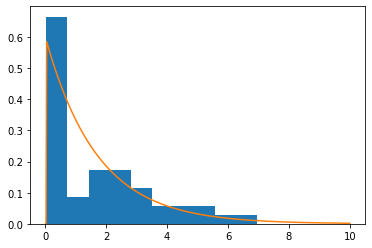

In [73]:
loc, lambdaa = expon.fit(inter_35)
rX = np.linspace(0,10, 500)
rP = expon.pdf(rX, loc, lambdaa)
a=plt.hist(inter_35,density=1)
plt.plot(rX, rP)

In [ ]:
kolmogorov smirnov test for goodness of fit

In [78]:
kstest(inter_35,"expon")

KstestResult(statistic=0.2641849166013106, pvalue=0.0014358389835886776)

In [79]:
gamma.fit(inter_35)
#print(fit_alpha, fit_loc, fit_beta)

(0.8079955863767317, 0.03333333333333143, 1.2912258775376846)

In [81]:
kstest(inter_35,"gamma",args=(0.8079955863767317, 0.03333333333333143, 1.2912258775376846))

KstestResult(statistic=0.24199254310314677, pvalue=0.004614269646108227)

In [95]:
exponweib.fit(inter_35)

(0.14305449611728088,
 2.786146779693693,
 0.03333333333333143,
 5.285101443858412)

In [194]:
# hypothezing a family of distribution

right skewed

In [198]:
import statistics 
print("cv: ", statistics.stdev(df["all"]**2)/df["all"].mean())


cv:  56.33065910723288


C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='all', ylabel='Density'>

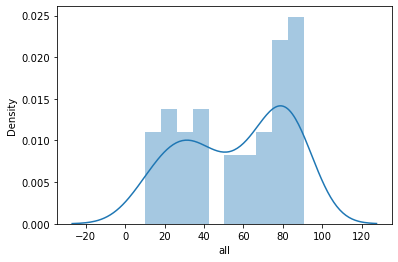

In [28]:
sns.distplot(df_1["all"], bins=10)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='all', ylabel='Density'>

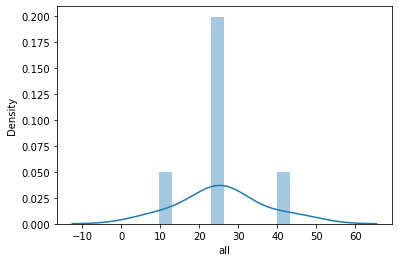

In [24]:
sns.distplot(df_3["all"], bins=10)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='all', ylabel='Density'>

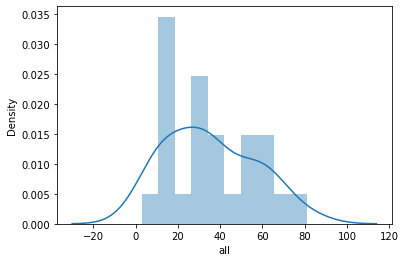

In [25]:
sns.distplot(df_5["all"], bins=10)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='all', ylabel='Density'>

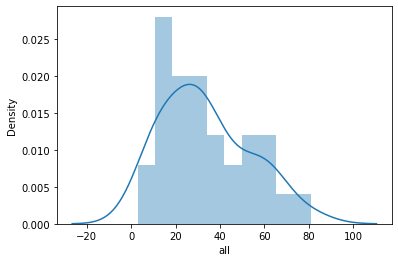

In [26]:
sns.distplot(d["all"], bins=10)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='all', ylabel='Density'>

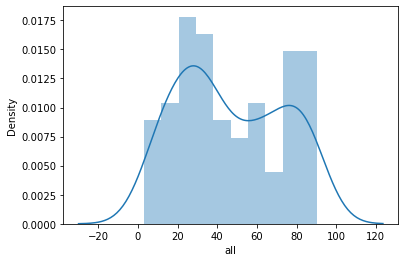

In [27]:
sns.distplot(df["all"], bins=10)

In [202]:
print("cv: ", statistics.stdev(d["all"]**2)/d["all"].mean())

cv:  47.632455344771586


C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

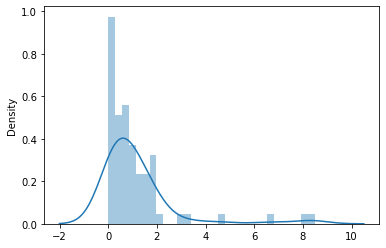

In [43]:
inter135 = []
data = sorted(df["all"])
for i in range(len(data)-1):
    inter135.append(data[i+1]-data[i] )
inter135 = pd.Series(inter135)
sns.distplot(inter135, bins=30)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

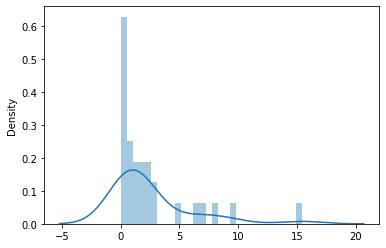

In [39]:
inter35 = []
data = sorted(d["all"])
for i in range(len(data)-1):
    inter35.append(data[i+1]-data[i] )
inter35 = pd.Series(inter35)
sns.distplot(inter35, bins=30)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

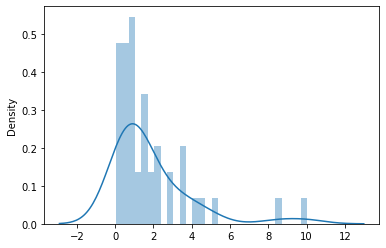

In [40]:
inter1= []
data = sorted(df_1["all"])
for i in range(len(data)-1):
    inter1.append(data[i+1]-data[i] )
inter1= pd.Series(inter1)
sns.distplot(inter1, bins=30)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

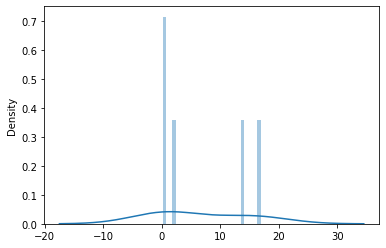

In [41]:
inter3 = []
data = sorted(df_3["all"])
for i in range(len(data)-1):
    inter3.append(data[i+1]-data[i] )
inter3 = pd.Series(inter3)
sns.distplot(inter3, bins=30)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

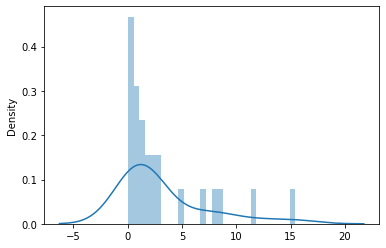

In [42]:
inter5 = []
data = sorted(df_5["all"])
for i in range(len(data)-1):
    inter5.append(data[i+1]-data[i] )
inter5 = pd.Series(inter5)
sns.distplot(inter5, bins=30)